# Quantifying & Analyzing Band Powers of Electroencephography (EEG) Data Based on OpenBCI Cyton Board Dataset
### by Dan Jang

This project focuses on digesting the complex, highly data-verbose nature of electroencephography (EEG) data into readable, visually represented formats (e.g. pretty graphs, visual insights, etc.), for a given end-user of at least a familiarity of numerical analysis to get meaningful insight from.

Electroencephography (EEG) is a non-invasive technique used to record electrical brain activity. Electrodes are placed on the scalp of the brain that measure microcurrents (uVrms).

Primarily, we will be focusing on categorizing the brain waves as:

* Alpha (8-13 Hz) - Alert but relaxed; e.g., eyes are closed or meditation is occuring.
* Beta (13-30 Hz) - Awake and alert; e.g.,
eyes are open and actively thinking.
* Gamma (30-100 Hz) - Higher mental activity, including perception, problem solving, and consciousness (fun fact: lots of "EEG" toys are based on capturing this frequency range as its high enough to be easily captured by cheap sensors)
* Delta (0.5-4 Hz) - Deep sleep
* Theta (4-8 Hz) - which occurs usually during light sleep, deep meditation, and also REM (Rapid Eye Movement) sleep.


In order of increasing frequency (in Hertz \[Hz\]):
1. Delta, from 0.5 to 4 Hz.
2. Theta, from 4 to 8 Hz.
3. Alpha, from 8 to 13 Hz.
4. Beta, from 13 to 30 Hz.
5. Gamma, from 30 to 100 Hz.


Using graphical analysis we can categorize these brain waves and see how they change over time. Using such data, we can take a glimpse into brain activity through what activities / state of mind these brain waves may represent, e.g. deep concentrating, or relaxation over a period of time.

We can use the Fast Fourier Transformation (FFT) to categorize these bands for easy viewing.

![OpenBCIInterface](OpenBCIExampleforPH322Project.png)

For EEG data, I will be using a [OpenBCI Cyton](https://docs.openbci.com/Cyton/CytonLanding/) board, which is a low-cost, open-source, programmable, 8-channel EEG board. The board is connected to a computer via USB, and the data is streamed to the computer via a Python script. The data is then processed and analyzed using Python libraries such as [pyOpenBCI](https://github.com/openbci-archive/pyOpenBCI) and [PyQtGraph](https://www.pyqtgraph.org/).

The EEG headset I will be using to collect the data will feature 8-channel electrodes (based on an electroconductive Ag-AgCl coating), which are placed on the scalp, around areas of the brain that can be associated to specific lobes, e.g. electrodes 1 & 2 represent (pre)frontal cortex/lobes activity.

![OpenBCIHeadset](OpenBCIHeadsetforPH322Project.webp)

# Dependencies

### Libraries:
* Numpy, Matplotlib, Pandas, Seaborn
* Psychopy
* MNE
* Brainflow
* PyRiemann

## Installation / Setup

To use with a Virtual Environment (e.g. miniconda3), run the following commands to install the above dependencies (if installing them normally did not complete / takes too long / et cetera.):

```bash
pip install vext.pyqt5

pip install arabic_reshaper astunparse distro esprima freetype-py future geventgitpython glfw imageio imageio-ffmpeg javascripthon json_tricks moviepy msgpack msgpack-numpy opencv-python openpyxl pillow psutil pyglet pyopengl pyosf pyparallel pyserial python-bidi python-gitlab pyyaml questplus requests[security] sounddevice soundfile tables xlrd

pip install psychopy --no-deps
```

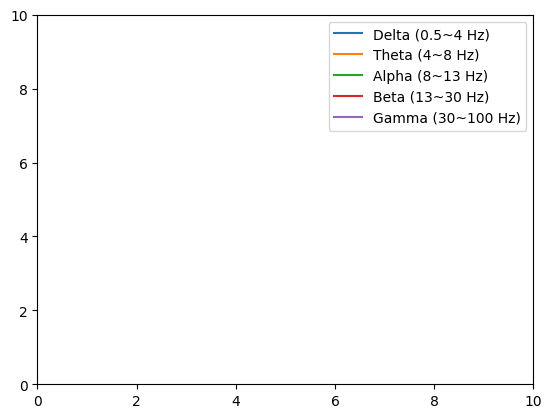

In [10]:
### PH 322 - Project - Dan Jang
## Credits to ChatGPT for EEG data processing & implementation

## Libraries

import brainflow as bf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from brainflow.board_shim import BoardShim, BrainFlowInputParams

# Read the .csv file
eeg_data_file = "./data/BrainFlow-RAW_2023-03-02_19-06-28_0.csv"#eeg_data.csv"
eeg_data = pd.read_csv(eeg_data_file)

# Set up the plot
fig, ax = plt.subplots()
x_data = []
y_data = [[] for _ in range(5)]  # 5 bands (delta, theta, alpha, beta, gamma)
# lines = [plt.plot([], [], animated=True, label=band)[0] for band in ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']]
lines = [plt.plot([], [], animated=True, label=band)[0] for band in ['Delta (0.5~4 Hz)', 'Theta (4~8 Hz)', 'Alpha (8~13 Hz)', 'Beta (13~30 Hz)', 'Gamma (30~100 Hz)']]

# Function to initialize the plot
def init():
    ax.set_xlim(0, 10)  # Adjust the x-axis range as needed
    ax.set_ylim(0, 10)  # Adjust the y-axis range as needed
    ax.legend()
    return lines

# Function to calculate band powers
def calculate_band_powers(data, channels, sampling_rate, apply_filters=True):
    eeg_data = data.T
    eeg_data = np.asarray(eeg_data)

    # Apply filters if required
    if apply_filters:
        for channel in channels:
            eeg_data[channel] = bf.signal_processing.perform_bandpass(eeg_data[channel], sampling_rate, 2, 50, 4, 0)
            eeg_data[channel] = bf.signal_processing.perform_bandstop(eeg_data[channel], sampling_rate, 2, 60, 4, 0)

    # Calculate average band powers
    avg_band_powers, _ = bf.signal_processing.get_avg_band_powers(eeg_data, channels, sampling_rate, apply_filters)
    return avg_band_powers

# Function to update the plot
def update(frame):
    x_data.append(frame)
    channels = [i for i in range(8)]  # Assuming an 8-channel EEG OpenBCI Cyton Board headset
    sampling_rate = 250  # Assuming a sampling rate of 250 Hz
    
    #y_data.append(np.sin(frame))
    
    ### From BrainFlow API Docs:
    ## std::pair<double*, double*> get_avg_band_powers(const BrainFlowArray<double, 2> &data, std::vector<int> channels, int sampling_rate, bool apply_filters)
    # calculate avg and stddev of BandPowers across all channels
    ## Return:
    # pair of double arrays of size 5, first of them - avg band powers, second stddev
    ## Parameters -
    # data: input 2d array
    # cols: number of cols in 2d array - number of datapoints
    # channels: vector of rows - eeg channels which should be used
    # sampling_rate: sampling rate
    # apply_filters: set to true to apply filters before band power calculations
    #bf.get_avg_band_powers(eeg_data, 1, 250, True)
    
    #y_data.append(bf.get_avg_band_powers(eeg_data, 1, 250, True))
    band_powers = bf.calculate_band_powers(eeg_data[channels], channels, sampling_rate)

    for i, band_power in enumerate(band_powers):
        y_data[i].append(band_power)
        lines[i].set_data(x_data, y_data[i])

    return lines

# Set up the animation
ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, 100),  # Adjust the frames range as needed
                    init_func=init, blit=True, interval=100, repeat=True)

# Display the animation
plt.show()


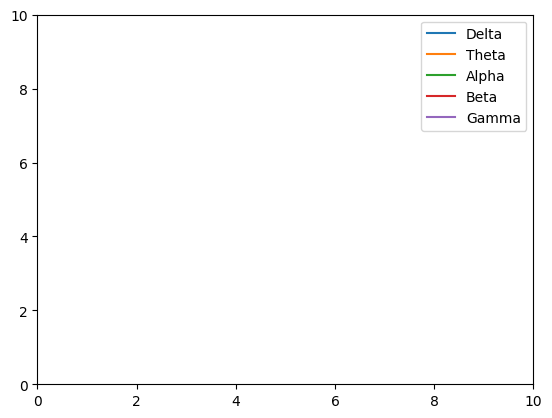

In [15]:
import brainflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from brainflow.board_shim import BoardShim, BrainFlowInputParams

# Read the .csv file
eeg_data_file = "./data/BrainFlow-RAW_2023-03-02_19-06-28_0.csv"
eeg_data = pd.read_csv(eeg_data_file)

# Set up the plot
fig, ax = plt.subplots()
x_data = []
y_data = [[] for _ in range(5)]  # 5 bands (delta, theta, alpha, beta, gamma)
lines = [plt.plot([], [], animated=True, label=band)[0] for band in ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']]
#lines = [plt.plot([], [], animated=True, label=band)[0] for band in ['Delta (0.5~4 Hz)', 'Theta (4~8 Hz)', 'Alpha (8~13 Hz)', 'Beta (13~30 Hz)', 'Gamma (30~100 Hz)']]

# Function to initialize the plot
def init():
    ax.set_xlim(0, 10)  # Adjust the x-axis range as needed
    ax.set_ylim(0, 10)  # Adjust the y-axis range as needed
    ax.legend()
    return lines

# Function to calculate band powers
def calculate_band_powers(data, channels, sampling_rate, apply_filters=True):
    eeg_data = data.T
    eeg_data = np.asarray(eeg_data)

    # Apply filters if required
    if apply_filters:
        for channel in channels:
            eeg_data[channel] = bf.signal_processing.perform_bandpass(eeg_data[channel], sampling_rate, 2, 50, 4, 0)
            eeg_data[channel] = bf.signal_processing.perform_bandstop(eeg_data[channel], sampling_rate, 2, 60, 4, 0)

    # Calculate average band powers
    avg_band_powers, _ = bf.signal_processing.get_avg_band_powers(eeg_data, channels, sampling_rate, apply_filters)
    return avg_band_powers

# Function to update the plot
def update(frame):
    x_data.append(frame)
    channels = [i for i in range(8)]  # Assuming an 8-channel EEG OpenBCI Cyton Board headset
    sampling_rate = 250  # Assuming a sampling rate of 250 Hz
    band_powers = calculate_band_powers(eeg_data[channels], channels, sampling_rate)

    for i, band_power in enumerate(band_powers):
        y_data[i].append(band_power)
        lines[i].set_data(x_data, y_data[i])

    return lines

# Set up the animation
ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, 100),  # Adjust the frames range as needed
                    init_func=init, blit=True, interval=100, repeat=True)

# Display the animation
plt.show()

KeyError: "None of [Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int32')] are in the [columns]"

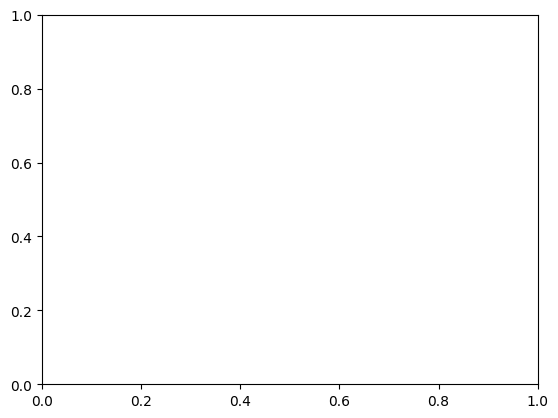

In [27]:
import brainflow as bf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from brainflow.board_shim import BoardShim, BrainFlowInputParams

# Read the .csv file
eeg_data_file = "./data/BrainFlow-RAW_2023-03-02_19-06-28_0.csv"#eeg_data_file = "eeg_data.csv"
eeg_data = pd.read_csv(eeg_data_file, delimiter='\t', header=None)

# Set column names
column_names = [str(i) for i in range(eeg_data.shape[1])]
eeg_data.columns = column_names

# Function to calculate band powers
def calculate_band_powers(data, channels, sampling_rate, apply_filters=True):
    eeg_data = data[channels].values.T
    eeg_data = np.asarray(eeg_data)

    # Apply filters if required
    if apply_filters:
        for channel in range(len(channels)):
            eeg_data[channel] = bf.signal_processing.perform_bandpass(eeg_data[channel], sampling_rate, 2, 50, 4, 0)
            eeg_data[channel] = bf.signal_processing.perform_bandstop(eeg_data[channel], sampling_rate, 2, 60, 4, 0)

    # Calculate average band powers
    avg_band_powers, _ = bf.signal_processing.get_avg_band_powers(eeg_data, list(range(len(channels))), sampling_rate, apply_filters)
    return avg_band_powers


# Calculate the duration
sampling_rate = 250  # Assuming a sampling rate of 250 Hz
num_datapoints = len(eeg_data)
duration = num_datapoints / sampling_rate

# Set up the plot
fig, ax = plt.subplots()
bands = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
x_data = np.linspace(0, duration, num_datapoints)
y_data = [[] for _ in range(5)]  # 5 bands (delta, theta, alpha, beta, gamma)

# Calculate band powers for each time step
channels = [i for i in range(8)]  # Assuming an 8-channel EEG OpenBCI Cyton Board headset
for i in range(num_datapoints):
    band_powers = calculate_band_powers(eeg_data.iloc[[i]][channels], channels, sampling_rate)
    for j, band_power in enumerate(band_powers):
        y_data[j].append(band_power)

# Plot the band powers over the total duration
for i, band in enumerate(bands):
    plt.plot(x_data, y_data[i], label=band)

# Set axis labels and legend
plt.xlabel("Time (s)")
plt.ylabel("Band Power")
plt.legend()

# Display the plot
plt.show()

## Conclusion

Using Python, we can analyze the EEG data and categorize the brain waves into their respective bands. We can then use the data to create graphs that show the brain wave activity over time. This can be used to analyze the brain wave activity of a person and determine what state of mind they are in, e.g. deep concentration, relaxation, etc.

We used the Fast Fourier Transformation to process OpenBCI EEG raw data to visualize the different brain waves (Alpha, Beta, Gamma, Delta, Theta) in a graph. We can see that the brain waves are categorized into their respective bands and we can see how they change over time.

### Resources

[BrainFlow API](https://brainflow.readthedocs.io/en/stable/)

Specifically, [BrainFlow API - get_avg-band_powers()](https://brainflow.readthedocs.io/en/stable/UserAPI.html?highlight=band_powers#_CPPv4N10DataFilter19get_avg_band_powersERK14BrainFlowArrayIdXL2EEENSt6vectorIiEEib)

OpenBCI Plotting GitHub: https://github.com/andreaortuno/Plotting_OpenBCI_Cyton_Data_live

[OpenBCI Cyton](https://docs.openbci.com/Cyton/CytonLanding/)

[pyOpenBCI](https://github.com/openbci-archive/pyOpenBCI)

[PyQtGraph](https://www.pyqtgraph.org/)

ChatGPT

[BrainFlow Notebooks](https://github.com/JadinTredup/brainflow-notebooks)

##### Extras: Commented Out Code

In [ ]:

# import numpy as np
# import pandas as pd
# import mne
# #from mne.time_frequency import psd_welch
# from mayavi import mlab
# import time

# # Step 1: Read the BrainFlow-RAW .csv file
# file_name = "data/BrainFlow-RAW_2023-03-02_19-06-28_0.csv"
# raw_data = pd.read_csv(file_name, header=None).values.T
# n_channels = 8
# sampling_rate = 250  # Adjust based on the sampling rate of your data

# # Step 2: Pre-process the EEG data
# # Create an MNE info object for the raw data
# ch_names = [f"E{i + 1}" for i in range(n_channels)] + ["STI 014"]
# ch_types = ["eeg" for _ in range(n_channels)] + ["stim"]
# info = mne.create_info(ch_names=ch_names,
#                        sfreq=sampling_rate,
#                        ch_types=ch_types)

# # Create MNE raw object
# raw = mne.io.RawArray(raw_data, info)
# raw.set_eeg_reference("average", projection=True)  # Set EEG average reference

# # Filter the data
# raw.filter(1, 50)  # Filter between 1 Hz and 50 Hz


# # Step 3: Calculate the band powers
# def get_band_powers(raw_data, n_channels):
#     # Define frequency bands
#     freq_bands = {
#         "delta": [1, 4],
#         "theta": [4, 8],
#         "alpha": [8, 14],
#         "beta": [14, 30],
#         "gamma": [30, 50]
#     }
#     band_powers = []

#     # Calculate power spectral density (PSD) using Welch's method
#     psds, freqs = psd_welch(raw_data, fmin=1, fmax=50)

#     # Normalize PSDs
#     psds /= np.sum(psds, axis=-1, keepdims=True)

#     # Calculate band powers for each channel
#     for ch_idx in range(n_channels):
#         band_powers.append([
#             np.sum(psds[ch_idx, (freqs >= low) & (freqs <= high)])
#             for low, high in freq_bands.values()
#         ])

#     return np.array(band_powers)


# # Step 4: Visualize the band powers in a 3D live stream
# def visualize_band_powers(band_powers):
#     # Create a 3D bar plot
#     fig = mlab.figure(size=(600, 600))
#     x, y = np.mgrid[0:8:1, 0:5:1]
#     s = mlab.barchart(x, y, band_powers.T, figure=fig)

#     while True:
#         # Update the band powers
#         band_powers = get_band_powers(raw[:, :][0], n_channels)

#         # Update the 3D bar plot
#         s.mlab_source.scalars = band_powers.T
#         mlab.draw(fig)
#         time.sleep(0.1)


# if __name__ == "__main__":
#     band_powers = get_band_powers(raw[:, :][0], n_channels)
#     visualize_band_powers(band_powers)

# import sys
# import numpy as np
# import pandas as pd
# from PyQt5.QtWidgets import QApplication, QMainWindow
# import pyqtgraph as pg
# import pyqtgraph.opengl as gl
# from scipy.fft import fft

# # Load CSV data
# def load_csv_data(file_path):
#     data = pd.read_csv(file_path, header=None)
#     return data

# # Preprocess EEG data and extract frequency bands
# def preprocess_eeg_data(data, sample_rate=250):
#     # Define frequency bands
#     bands = {
#         'delta': (0.5, 4),
#         'theta': (4, 8),
#         'alpha': (8, 13),
#         'beta': (13, 30),
#         'gamma': (30, 100)
#     }

#     # Extract data from each channel
#     channels_data = [data.iloc[:, i].values for i in range(1, 9)]

#     # Calculate FFT for each channel
#     fft_data = [np.abs(fft(channel_data)) for channel_data in channels_data]
#     freqs = np.fft.fftfreq(len(channels_data[0]), 1 / sample_rate)

#     # Calculate average power in each frequency band for each channel
#     band_data = []
#     for i, channel_fft in enumerate(fft_data):
#         band_powers = []
#         for band_name, (low_freq, high_freq) in bands.items():
#             mask = (freqs >= low_freq) & (freqs <= high_freq)
#             band_power = np.mean(channel_fft[mask])
#             band_powers.append(band_power)

#         band_data.append({'channel': i + 1, 'band_powers': band_powers})

#     return band_data

# # Plot 3D band data
# def plot_band_data(data):
#     # Create the PyQt5 application and main window
#     app = QApplication(sys.argv)
#     main_window = QMainWindow()
#     main_window.setWindowTitle('3D Band Plot')

#     # Create a 3D OpenGL plot widget
#     plot_widget = gl.GLViewWidget()
#     plot_widget.setBackgroundColor('w')
#     main_window.setCentralWidget(plot_widget)

#     # Preprocess the EEG data and extract the frequency bands
#     band_data = preprocess_eeg_data(data)

#     # Plot the frequency bands in 3D using the OpenGL plot widget
#     # Depending on your data format, you may need to adjust the coordinates and color
#     for band in band_data:
#         x, y, z, color = band['x'], band['y'], band['z'], band['color']
#         scatter_plot_item = gl.GLScatterPlotItem(pos=np.array([x, y, z]),
#                                                  color=color,
#                                                  size=10)
#         plot_widget.addItem(scatter_plot_item)

#     # Show the main window and start the PyQt5 event loop
#     main_window.show()
#     sys.exit(app.exec_())

# if __name__ == '__main__':
#     file_path = 'OpenBCISession_2023-03-02_19-06-28/BrainFlow-RAW_2023-03-02_19-06-28_0.csv'
#     data = load_csv_data(file_path)
#     plot_band_data(data)

# ### PH 322 - Project - Dan Jang
# ## Credits to ChatGPT for EEG data processing & implementation

# ## Libraries

# import brainflow as bf
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# from brainflow.board_shim import BoardShim, BrainFlowInputParams

# # Read the .csv file
# eeg_data_file = "./data/BrainFlow-RAW_2023-03-02_19-06-28_0.csv"#eeg_data.csv"
# eeg_data = pd.read_csv(eeg_data_file)

# # Set up the plot
# fig, ax = plt.subplots()
# x_data = []
# y_data = [[] for _ in range(5)]  # 5 bands (delta, theta, alpha, beta, gamma)
# # lines = [plt.plot([], [], animated=True, label=band)[0] for band in ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']]
# lines = [plt.plot([], [], animated=True, label=band)[0] for band in ['Delta (0.5~4 Hz)', 'Theta (4~8 Hz)', 'Alpha (8~13 Hz)', 'Beta (13~30 Hz)', 'Gamma (30~100 Hz)']]

# # Function to initialize the plot
# def init():
#     ax.set_xlim(0, 10)  # Adjust the x-axis range as needed
#     ax.set_ylim(0, 10)  # Adjust the y-axis range as needed
#     ax.legend()
#     return lines

# # Function to calculate band powers
# def calculate_band_powers(data, channels, sampling_rate, apply_filters=True):
#     eeg_data = data.T
#     eeg_data = np.asarray(eeg_data)

#     # Apply filters if required
#     if apply_filters:
#         for channel in channels:
#             eeg_data[channel] = bf.signal_processing.perform_bandpass(eeg_data[channel], sampling_rate, 2, 50, 4, 0)
#             eeg_data[channel] = bf.signal_processing.perform_bandstop(eeg_data[channel], sampling_rate, 2, 60, 4, 0)

#     # Calculate average band powers
#     avg_band_powers, _ = bf.signal_processing.get_avg_band_powers(eeg_data, channels, sampling_rate, apply_filters)
#     return avg_band_powers

# # Function to update the plot
# def update(frame):
#     x_data.append(frame)
#     channels = [i for i in range(8)]  # Assuming an 8-channel EEG OpenBCI Cyton Board headset
#     sampling_rate = 250  # Assuming a sampling rate of 250 Hz
    
#     #y_data.append(np.sin(frame))
    
#     ### From BrainFlow API Docs:
#     ## std::pair<double*, double*> get_avg_band_powers(const BrainFlowArray<double, 2> &data, std::vector<int> channels, int sampling_rate, bool apply_filters)
#     # calculate avg and stddev of BandPowers across all channels
#     ## Return:
#     # pair of double arrays of size 5, first of them - avg band powers, second stddev
#     ## Parameters -
#     # data: input 2d array
#     # cols: number of cols in 2d array - number of datapoints
#     # channels: vector of rows - eeg channels which should be used
#     # sampling_rate: sampling rate
#     # apply_filters: set to true to apply filters before band power calculations
#     #bf.get_avg_band_powers(eeg_data, 1, 250, True)
    
#     #y_data.append(bf.get_avg_band_powers(eeg_data, 1, 250, True))
#     band_powers = bf.calculate_band_powers(eeg_data[channels], channels, sampling_rate)

#     for i, band_power in enumerate(band_powers):
#         y_data[i].append(band_power)
#         lines[i].set_data(x_data, y_data[i])

#     return lines

# # Set up the animation
# ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, 100),  # Adjust the frames range as needed
#                     init_func=init, blit=True, interval=100, repeat=True)

# # Display the animation
# plt.show()


# import brainflow as bf
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from brainflow.board_shim import BoardShim, BrainFlowInputParams

# # Read the .csv file
# eeg_data_file = "./data/BrainFlow-RAW_2023-03-02_19-06-28_0.csv"#eeg_data_file = "eeg_data.csv"
# eeg_data = pd.read_csv(eeg_data_file, delimiter='\t', header=None)

# # Set column names
# column_names = [str(i) for i in range(eeg_data.shape[1])]
# eeg_data.columns = column_names

# # Function to calculate band powers
# def calculate_band_powers(data, channels, sampling_rate, apply_filters=True):
#     eeg_data = data[channels].values.T
#     eeg_data = np.asarray(eeg_data)

#     # Apply filters if required
#     if apply_filters:
#         for channel in range(len(channels)):
#             eeg_data[channel] = bf.signal_processing.perform_bandpass(eeg_data[channel], sampling_rate, 2, 50, 4, 0)
#             eeg_data[channel] = bf.signal_processing.perform_bandstop(eeg_data[channel], sampling_rate, 2, 60, 4, 0)

#     # Calculate average band powers
#     avg_band_powers, _ = bf.signal_processing.get_avg_band_powers(eeg_data, list(range(len(channels))), sampling_rate, apply_filters)
#     return avg_band_powers


# # Calculate the duration
# sampling_rate = 250  # Assuming a sampling rate of 250 Hz
# num_datapoints = len(eeg_data)
# duration = num_datapoints / sampling_rate

# # Set up the plot
# fig, ax = plt.subplots()
# bands = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
# x_data = np.linspace(0, duration, num_datapoints)
# y_data = [[] for _ in range(5)]  # 5 bands (delta, theta, alpha, beta, gamma)

# # Calculate band powers for each time step
# channels = [i for i in range(8)]  # Assuming an 8-channel EEG OpenBCI Cyton Board headset
# for i in range(num_datapoints):
#     band_powers = calculate_band_powers(eeg_data.iloc[[i]][channels], channels, sampling_rate)
#     for j, band_power in enumerate(band_powers):
#         y_data[j].append(band_power)

# # Plot the band powers over the total duration
# for i, band in enumerate(bands):
#     plt.plot(x_data, y_data[i], label=band)

# # Set axis labels and legend
# plt.xlabel("Time (s)")
# plt.ylabel("Band Power")
# plt.legend()

# # Display the plot
# plt.show()
